**Convolutional Neural Network to Identify Anomalies in ECG Signals**

Heart disease affects millions of people around the world and is one of the leading causes of death. ECG is a powerful tool for analyzing heart condition. However, it is extremely time consuming and requires trained staff that are of limited supply. Recent advances in Neural Networks made classifying images possible and with high accuracy. The objective of this project is to create a Neural Network that can identify and classify ECG signals with very high accuracy. 

In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline


In [2]:

base_path = "ecg_images_2"

train_dir = os.path.join(base_path, 'train')

validation_dir = os.path.join(base_path, 'validation')

test_dir = os.path.join(base_path, 'test')


This project uses the [Keras](https://keras.io/) library, running on top of [Tensorflow](https://www.tensorflow.org/). Both of these are open source packages.

In [3]:
import tensorflow as tf
import keras

Using TensorFlow backend.


The Neural Network consists of layers of increasing size. This enables the network to learn increasingly abstract features in the images. This network is based on an example in [Deep Learning with Python](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438). The network classifies images into one of six categories corresponding to the six target beat types.

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5),
              metrics=['acc'])

We use the image data generator function of Keras. This is a simple way of making the neural network cycle through the train and validation folders in batches during the learning process.

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        color_mode = "grayscale",
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        color_mode = "grayscale", 
        batch_size=20,
        class_mode='categorical')

Found 86637 images belonging to 7 classes.
Found 10829 images belonging to 7 classes.


In [8]:
import PIL
from PIL import Image

history = model.fit_generator(
      train_generator,
      steps_per_epoch=4000,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=535)


Epoch 1/100
4000/4000 [==============================] - 90s 23ms/step - loss: 0.4588 - acc: 0.8678 - val_loss: 0.1482 - val_acc: 0.9647
Epoch 2/100
4000/4000 [==============================] - 87s 22ms/step - loss: 0.1482 - acc: 0.9628 - val_loss: 0.1031 - val_acc: 0.9757
Epoch 3/100
4000/4000 [==============================] - 87s 22ms/step - loss: 0.1137 - acc: 0.9702 - val_loss: 0.0794 - val_acc: 0.9812
Epoch 4/100
4000/4000 [==============================] - 87s 22ms/step - loss: 0.0921 - acc: 0.9763 - val_loss: 0.0641 - val_acc: 0.98540.9
Epoch 5/100
4000/4000 [==============================] - 87s 22ms/step - loss: 0.0795 - acc: 0.9796 - val_loss: 0.0553 - val_acc: 0.9865
Epoch 6/100
4000/4000 [==============================] - 87s 22ms/step - loss: 0.0697 - acc: 0.9813 - val_loss: 0.0621 - val_acc: 0.9858
Epoch 7/100
4000/4000 [==============================] - 88s 22ms/step - loss: 0.0633 - acc: 0.9833 - val_loss: 0.0513 - val_acc: 0.9877
Epoch 8/100
4000/4000 [===============

4000/4000 [==============================] - 88s 22ms/step - loss: 0.0085 - acc: 0.9977 - val_loss: 0.0408 - val_acc: 0.9924
Epoch 61/100
4000/4000 [==============================] - 88s 22ms/step - loss: 0.0078 - acc: 0.9976 - val_loss: 0.0386 - val_acc: 0.9919
Epoch 62/100
4000/4000 [==============================] - 88s 22ms/step - loss: 0.0077 - acc: 0.9977 - val_loss: 0.0464 - val_acc: 0.9920
Epoch 63/100
4000/4000 [==============================] - 88s 22ms/step - loss: 0.0074 - acc: 0.9977 - val_loss: 0.0446 - val_acc: 0.9916
Epoch 64/100
4000/4000 [==============================] - 88s 22ms/step - loss: 0.0074 - acc: 0.9978 - val_loss: 0.0386 - val_acc: 0.9920
Epoch 65/100
4000/4000 [==============================] - 88s 22ms/step - loss: 0.0072 - acc: 0.9977 - val_loss: 0.0412 - val_acc: 0.9931-  - ETA: 0s - loss: 0.0071
Epoch 66/100
4000/4000 [==============================] - 88s 22ms/step - loss: 0.0069 - acc: 0.9980 - val_loss: 0.0393 - val_acc: 0.9915
Epoch 67/100
4000/40

In [9]:
model.save('ECG_cnn.h5')

The charts below show the accuracy and loss for training and validation. We want these to be fairly similar otherwise it shows that the network is overfitting. 

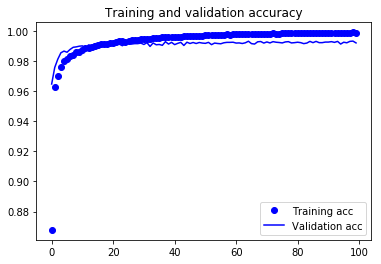

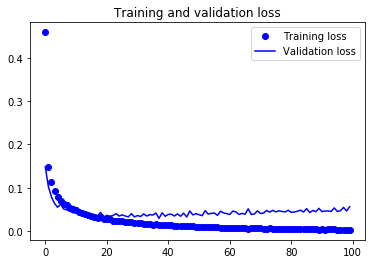

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Although the accuracy is about 98.5%, the accuracy measure by itself is misleading because most heart beats are normal and so we could classify every heartbeat as normal and have a high accuracy although this wouldn't be very useful. Keras does not have a way to do this, so we will use [Scikit-learn](https://scikit-learn.org/stable/) to do this analysis.

The overall accuracy of the model against the test sample is almost 99%. The table below also shows the following metrics for each beat type: 

* Precision: What proportion of positive identifications was actually correct?
* Recall: What proportion of actual positives was identified correctly?
* F1 Score: The balance between precision and recall

For each beat type, the precision and recall are in the 98-99% range, except for recall for beat type A. The reason is most likely because this beat type has the least number of samples.

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

testing_datagen = ImageDataGenerator(rescale=1./255)
test_generator = testing_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        color_mode = "grayscale", 
        batch_size=20,
        class_mode='categorical',
        shuffle = False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 535)
test_accuracy = test_acc*100
print('test accuracy: %.2f percent' %(test_accuracy))
print('test loss: %.2f' %(test_loss))

predictions = model.predict_generator(
    test_generator, 
    steps = np.math.ceil(test_generator.samples/ test_generator.batch_size))

predicted_classes = np.argmax(predictions, axis = 1)

true_classes = test_generator.classes 
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names = class_labels, digits = 3)
print(report)

Found 10834 images belonging to 7 classes.
test accuracy: 99.36 percent
test loss: 0.03
              precision    recall  f1-score   support

           +      1.000     0.960     0.980       126
           A      0.949     0.878     0.912       255
           L      0.999     0.993     0.996       808
           N      0.995     0.998     0.996      7503
           P      0.999     1.000     0.999       703
           R      0.994     0.993     0.994       726
           V      0.982     0.990     0.986       713

   micro avg      0.994     0.994     0.994     10834
   macro avg      0.988     0.973     0.980     10834
weighted avg      0.994     0.994     0.994     10834



Another useful way to look at the results is with a confusion matrix. This shows the true positive, false positive, true negative, and false negative for each beat type. This is similar data to the chart above, just more granular. 

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.9936311611593133


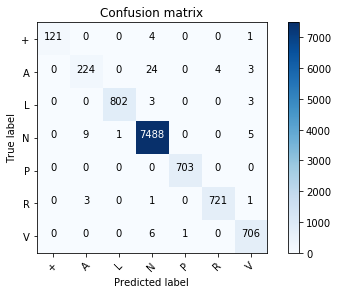

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import itertools

# compute the confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = class_labels) 
print(accuracy_score(true_classes, predicted_classes))